## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [506]:
%%html
<style>.output_wrapper, .output {height:auto !important; max-height:1000px;
                                }.output_scroll {box-shadow:none !important; webkit-box-shadow:none !important;}</style>

In [435]:
# For solving this issue with scipy
# https://github.com/statsmodels/statsmodels/issues/3931
import scipy as sp
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [436]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [437]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [438]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [439]:
len(df['user_id'].unique())

290584

d. The proportion of users converted.

In [440]:
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [441]:
pd.crosstab(df.group, df.landing_page, margins=True)

landing_page,new_page,old_page,All
group,,,
control,1928,145274,147202
treatment,145311,1965,147276
All,147239,147239,294478


The new_page and treatment do not match 1965 times. What is not new_page on the treatment row in the above crosstab table is the number we are missing.

f. Do any of the rows have missing values?

In [442]:
df.isnull().values.any()

False

No Nulls in the dataframe

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [443]:
df2 = df.loc[(df['group'] == 'control') & (df['landing_page'] == 'old_page') | (df['group'] == 'treatment') & (df['landing_page'] == 'new_page')]

In [444]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [445]:
len(df2['user_id'].unique())

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [446]:
df3 = df2[df2.duplicated(['user_id'], keep=False)]
df.loc[df.duplicated(), :]

,user_id,timestamp,group,landing_page,converted


c. What is the row information for the repeat **user_id**? 

In [447]:
df3

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [448]:
df2 = df2.drop_duplicates(['user_id'], keep='first')
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [449]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [450]:
df.query('group == "control"').converted.mean()

0.12039917935897611

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [451]:
df.query('group == "treatment"').converted.mean()

0.11891957956489856

d. What is the probability that an individual received the new page?

In [452]:
(df2[df2['landing_page'] == 'new_page']).count()/len(df2.landing_page)

user_id         0.500062
timestamp       0.500062
group           0.500062
landing_page    0.500062
converted       0.500062
dtype: float64

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**There is no evidence that the new treatment page leads to more conversions. We do see that the old page has slightly better perfomances (0.1204, compare to the treatment group - 0.1195).**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$H_{0}$: **$p_{old}$** >= **$p_{new}$** <br>
$H_{1}$ : **$p_{old}$** < **$p_{new}$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [453]:
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [454]:
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [455]:
n_new = len(df2.query("group == 'treatment'"))
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [456]:
n_old = len(df2.query("group == 'control'"))
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [457]:
new_page_converted = np.random.binomial(n_new, p_new)
new_page_converted

17538

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [458]:
old_page_converted = np.random.binomial(n_old, p_old)
old_page_converted

17529

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [459]:
new_page_converted/n_new - old_page_converted/n_old

3.20430853646414e-05

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [460]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(n_new, p_new)
    old_page_converted = np.random.binomial(n_old, p_old)
    conv_diff = (new_page_converted)/n_new - (old_page_converted)/n_old
    p_diffs.append(conv_diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([  10.,   72.,  361., 1285., 2540., 2927., 1871.,  733.,  172.,
          29.]),
 array([-0.00474433, -0.00384063, -0.00293693, -0.00203323, -0.00112953,
        -0.00022583,  0.00067787,  0.00158157,  0.00248527,  0.00338897,
         0.00429267]),
 <a list of 10 Patch objects>)

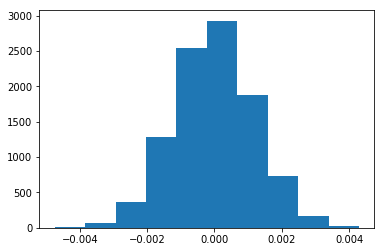

In [461]:
plt.hist(p_diffs)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [462]:
orig_diff_m = df2[df2['group'] == 'treatment']['converted'].mean() -  df2[df2['group'] == 'control']['converted'].mean()
p_diffs = np.array(p_diffs)
(orig_diff_m < p_diffs).mean()

0.9029

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**We just computed the p-value. The p-value of 0.9 is larger than the critical value of 0.05, thus we will fail to reject the Null hypothesis and say that there is no proof that the new test results were better than the old ones.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [463]:
import statsmodels.api as sm

convert_old = sum(df2.query("group == 'control'")['converted'])
convert_new = sum(df2.query("group == 'treatment'")['converted'])
n_old = len(df2.query("group == 'control'"))
n_new = len(df2.query("group == 'treatment'"))

print(convert_old)
print(convert_new)
print(n_old)
print(n_new)


17489
17264
145274
145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [464]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print(z_score, p_value)

1.3109241984234394 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [465]:
from scipy.stats import norm
# Assuming 95% confidence interval for one-tailed z-test the critical value is:
print(norm.ppf(1-(0.05)))

1.6448536269514722


**The z-score in a 95% confidence interval is bigger than the critical value of 1.644, therefore we will fail to reject the null. The numbers here do agree with the answers in questions j. and k.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [466]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [477]:
df2['intercept'] = 1
df2['ab_page'] = pd.get_dummies(df2.group)['treatment']
df2['treatment', 'control'] = pd.get_dummies(df2.group)['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,"(treatment, control)",intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,0,2
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,0,2
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,2
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,2
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,0,2


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [478]:
import statsmodels.api as sm

logitmode = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logitmode.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [479]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 28 Feb 2019   Pseudo R-squ.:               8.077e-06
Time:                        00:32:41   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.9944      0.004   -246.669      0.000      -1.002      -0.986
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**The null and alternative hypotheses are** <br>
$H_{0}$ : $p_{new}$ - $p_{old}$ = 0<br>
$H_{1}$ : $p_{new}$ - $p_{old}$ != 0<br>

**This is a two-tailed test, while the hypothesis in part II above describes a one-tailed test.**<br>

**The p-value here is 0.19, compare to 0.90 we came up with in part II. In both cases we will fail to reject the null, as the values are bigger than the critical value. The reason for the difference between the p-values is the different method/test used.**<br> 

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Adding new factors that might correlate to the dependent factor can help with better predicting the result and a higher r-squared. An example for that might be the existing timestamp variable., which can be used to check days of the week that have more conversions, or which hours during the day conversions occur more frequently. <br>
Issue that might come up with adding new variables to a Logistic Regression model can be Multicullinearity. This is when the x variables are correlated to each other, which can lead to flip progression coefficient and misinterpretation of the results.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [507]:
countries_df = pd.read_csv('countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,"(treatment, control)",intercept
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,0,2
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,2
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,2
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,0,2
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,2


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [508]:
countries = pd.read_csv('countries.csv')
df_countries = pd.merge(df, countries, on='user_id')
df_countries.head()

,user_id,timestamp,group,landing_page,converted,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,US


In [510]:
df_countries[['CA', 'UK', 'US']] = pd.get_dummies(df_countries['country'])

df_countries['intercept'] = 1

df_countries.head()

,user_id,timestamp,group,landing_page,converted,country,CA,UK,US,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,US,0,0,1,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,US,0,0,1,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,US,0,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,US,0,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,US,0,0,1,1


In [511]:
new_model = sm.Logit(df_countries['converted'], df_countries[['intercept', 'CA', 'UK']])
results = new_model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366241
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               294478
Model:                          Logit   Df Residuals:                   294475
Method:                           MLE   Df Model:                            2
Date:                Thu, 28 Feb 2019   Pseudo R-squ.:               1.205e-05
Time:                        02:46:44   Log-Likelihood:            -1.0785e+05
converged:                       True   LL-Null:                   -1.0785e+05
                                        LLR p-value:                    0.2726
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9962      0.007   -294.261      0.000      -2.010      -1.983
CA            -0.0357      0.027     -1.340      0.180      -0.088       0.017
UK             0.0093      0.013      0.704      0.481      -0.017       0.035
==============================================================================
"""

**Looking at the above results after adding the countries to the Logistic Regression we can see that the p-values in both Canada and the United Kingdom are higher than the critical value. This means that we fail to reject the null and the new page did not do better in conversion compare to the old page, thus we will leave the old page. **